In [1]:
import os

import utils

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Dataset

- Performance of EPFL Students on the courses 

- 6562 students
- 36 courses
- 7 semesters
- 17490 grades

In [2]:
courses = {
    0: 'PHYS-106',
    1: 'EE-202',
    2: 'ENV-140'
}

(data, courses) = utils.getSQLData(courses)
D = len(courses.keys())
print('DATA SHAPE', data.shape)
data.head(10)

DATA SHAPE (17490, 5)


,StudentID,CourseID,ExamDate,Grade,Result
0,6561,20,2013-07-01,6.0,1
1,1281,14,2013-07-01,5.0,1
2,1280,14,2013-07-01,6.0,1
3,1279,14,2013-07-01,4.0,1
4,1278,14,2013-07-01,5.0,1
5,1277,14,2013-07-01,5.0,1
6,1276,14,2013-07-01,4.5,1
7,1275,14,2013-07-01,3.5,0
8,1274,14,2013-07-01,3.0,0
9,1273,14,2013-07-01,4.5,1


# Fitting the LFA model

In [3]:
from model import *

model = ModelLFA(D)
model.runData(data[['StudentID', 'CourseID', 'ExamDate', 'Result']].values)

In [4]:
[ (e.date, e.activity.id, e.student.id, e.result, e.state ) for e in model.students[4].events ]

[(Timestamp('2014-02-01 00:00:00'), 9, 4, 1, {4: 1, 9: 1}),
 (Timestamp('2014-02-01 00:00:00'), 4, 4, 0, {4: 1, 9: 1}),
 (Timestamp('2014-07-01 00:00:00'), 2, 4, 0, {2: 1, 3: 1, 4: 1, 9: 1}),
 (Timestamp('2014-07-01 00:00:00'), 3, 4, 1, {2: 1, 3: 1, 4: 1, 9: 1}),
 (Timestamp('2015-02-01 00:00:00'), 4, 4, 1, {2: 1, 3: 1, 4: 2, 9: 1}),
 (Timestamp('2015-07-01 00:00:00'), 0, 4, 1, {0: 1, 2: 1, 3: 1, 4: 2, 9: 1})]

In [5]:
courses

{0: 'PHYS-106',
 1: 'EE-202',
 2: 'ENV-140',
 3: 'CIVIL-122',
 4: 'PHYS-101',
 5: 'AR-491',
 6: 'MATH-251',
 7: 'CS-112',
 8: 'MATH-261',
 9: 'CS-111',
 10: 'EE-102',
 11: 'EE-100',
 12: 'BIO-482',
 13: 'CIVIL-210',
 14: 'MATH-250',
 15: 'EE-585',
 16: 'PHYS-209',
 17: 'AR-462',
 18: 'CS-279',
 19: 'COM-303',
 20: 'COM-500',
 21: 'ME-271',
 22: 'CS-212',
 23: 'CS-522',
 24: 'MATH-111',
 25: 'CS-107',
 26: 'MATH-150',
 27: 'CIVIL-123',
 28: 'AR-458',
 29: 'CS-210',
 30: 'CS-206',
 31: 'CS-305',
 32: 'MATH-110',
 33: 'PHYS-105',
 34: 'MGT-413',
 35: 'MATH-115',
 36: 'CH-241'}

In [6]:
subset = { 'EE-100', 'EE-102', 'PHYS-101', 'PHYS-106', 'MATH-111', 'MATH-150', 'CS-112', 'CIVIL-123', 'CS-111', 'CIVIL-122', 'ENV-140' }

l = len(subset)
activities = model.activities.values()

utils.generateGraph('G1', activities, courses, lambda a,b: (1e-2 * a.counts[b]), 'yellow')
utils.generateGraph('G2', activities, courses, lambda a,b: (3e0 * a.params[b]), 'red')

In [7]:
s = { 'CS-111', 'MATH-111', 'CIVIL-123', 'PHYS-101' }

for a in model.activities.values():
    if courses[a.id] in s:
        print('<<<', courses[a.id], '>>>')
        for b in range(a.D):
            if courses[b] in s and b != a.id:
                print('\t', courses[b], '\t', a.params[b],)
        print('\t', 'beta', '\t\t', a.params[-1])
        print('-----------------------------------------------')

<<< PHYS-101 >>>
	 CS-111 	 -0.351941914138
	 MATH-111 	 -0.213174152417
	 CIVIL-123 	 0.0
	 beta 		 -0.0675521246496
-----------------------------------------------
<<< CS-111 >>>
	 PHYS-101 	 0.116903033389
	 MATH-111 	 0.229045140511
	 CIVIL-123 	 0.0
	 beta 		 0.764839822556
-----------------------------------------------
<<< MATH-111 >>>
	 PHYS-101 	 0.049180818367
	 CS-111 	 -0.492802371912
	 CIVIL-123 	 0.0
	 beta 		 -0.00951153072202
-----------------------------------------------
<<< CIVIL-123 >>>
	 PHYS-101 	 -2.41593951717
	 CS-111 	 0.776032861977
	 MATH-111 	 0.80188801885
	 beta 		 -0.288921927222
-----------------------------------------------


## Basic stats

In [8]:
A = 4
B = 10

dataA = data[data.CourseID==A]
dataB = data[data.CourseID==B]

setA = set(dataA.StudentID.tolist())
setB = set(dataB.StudentID.tolist())

setC = setA & setB
dataC = data[data.StudentID.isin(setC)]
dataCA = dataC[dataC.CourseID==A]
dataCB = dataC[dataC.CourseID==B]

print('Number Of Students in', courses[A], ':', len(setA))
print('Number Of Students in', courses[B], ':', len(setB))
print()

print('Number Of Students in both courses :', len(setC))
print()

print('Success rate in', courses[A], ':', sum(dataA.Result.tolist())/dataA.shape[0])
print('Success rate in', courses[B], ':', sum(dataB.Result.tolist())/dataB.shape[0])
print()

print('Success rate in', courses[A], 'for mixed :', sum(dataCA.Result.tolist())/dataCA.shape[0])
print('Success rate in', courses[B], 'for mixed :', sum(dataCB.Result.tolist())/dataCB.shape[0])
print()

Number Of Students in PHYS-101 : 3280
Number Of Students in EE-102 : 545

Number Of Students in both courses : 24

Success rate in PHYS-101 : 0.458083832335
Success rate in EE-102 : 0.620839363242

Success rate in PHYS-101 for mixed : 0.592592592593
Success rate in EE-102 for mixed : 0.576923076923



In [9]:
print(model.activities[0].params)

[ 0.          1.02777047  0.23463967  0.6647651   0.43222163  0.          0.
  0.39192668  0.         -0.47721323  0.57866736  0.10979703  0.          0.
  1.13435785  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.03670358  0.          0.39246583
  0.05465081  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.25490699]


# Testing Optimizer with simulations

In [10]:
from simulation import * 
from optimizer import *

def test(OptimizerClass, nA, nAS, nS, e, unit, res1, res2):
    s = SimulationLFA(nA + 1, model)
#    print(s.model.activities[0].params)
    o = OptimizerClass(nA + 1) if not OptimizerClass.__name__ == 'EpsilonOptimizer' else OptimizerClass(nA + 1,nS,e)
    s.runWithOptimizer(o, nAS, nS)
    scores, su, fa = s.evaluateOptimality()
#    print(OptimizerClass.__name__, su, fa)
    for t, s in enumerate(scores):
        res1.append([OptimizerClass.__name__ + str(e), t, unit, s])
    res2.append([OptimizerClass.__name__ + str(e), su, fa, unit])
    return (s,o)

def runSimulation(nA, nAS, nS, nE):
    print('SIMULATION', nA, nAS, nS, nE)
    res = []
    counts = []
    for unit in range(100):
        if unit % 10 == 0:
            print('Iteration', unit)
        test(RandomOptimizer, nA, nAS, nS, '', unit, res, counts)
        test(BanditOptimizer, nA, nAS, nS, '', unit, res, counts)
        for e in nE:
            test(EpsilonOptimizer, nA, nAS, nS, e, unit, res, counts)
    
    res = pd.DataFrame(res, columns=['Optimizer', 'Time', 'Unit', 'Score'])
    print(res.groupby(['Optimizer'])['Score'].mean())

    counts = pd.DataFrame(counts, columns=['Optimizer', 'Success', 'Failure', 'Unit'])
    print(counts.groupby(['Optimizer'])['Success'].mean())

    
    sns.tsplot(data=res, time="Time", unit="Unit", condition="Optimizer", value="Score")

## Simulation 1

SIMULATION 2 1 1000 [10, 25, 50]
Iteration 0
Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90
Optimizer
BanditOptimizer       0.885248
EpsilonOptimizer10    0.715941
EpsilonOptimizer25    0.806877
EpsilonOptimizer50    0.939300
RandomOptimizer       0.616163
Name: Score, dtype: float64
Optimizer
BanditOptimizer       656.92
EpsilonOptimizer10    612.40
EpsilonOptimizer25    634.88
EpsilonOptimizer50    669.11
RandomOptimizer       591.98
Name: Success, dtype: float64


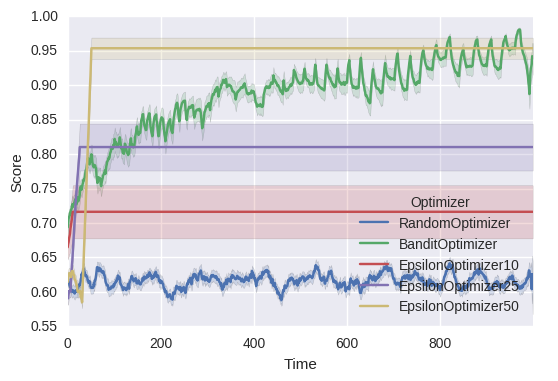

In [11]:
runSimulation(2, 1, 1000, [10, 25, 50])

## Simulation 2

SIMULATION 10 2 3000 [100, 500, 1000]
Iteration 0
Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90
Optimizer
BanditOptimizer         0.785224
EpsilonOptimizer100     0.749945
EpsilonOptimizer1000    0.768544
EpsilonOptimizer500     0.851128
RandomOptimizer         0.360836
Name: Score, dtype: float64
Optimizer
BanditOptimizer         2208.52
EpsilonOptimizer100     2176.61
EpsilonOptimizer1000    2168.38
EpsilonOptimizer500     2262.95
RandomOptimizer         1714.03
Name: Success, dtype: float64


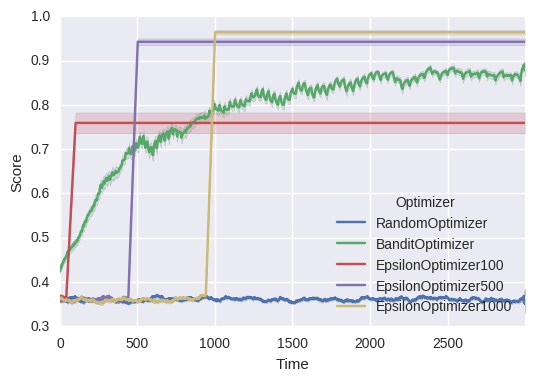

In [12]:
runSimulation(10, 2, 3000, [100, 500, 1000])

## Simulation 3

SIMULATION 30 3 5000 [200, 1000, 2000]
Iteration 0
Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90
Optimizer
BanditOptimizer         0.663777
EpsilonOptimizer1000    0.796388
EpsilonOptimizer200     0.624998
EpsilonOptimizer2000    0.660590
RandomOptimizer         0.170162
Name: Score, dtype: float64
Optimizer
BanditOptimizer         4037.22
EpsilonOptimizer1000    4203.68
EpsilonOptimizer200     3981.94
EpsilonOptimizer2000    3861.08
RandomOptimizer         2714.32
Name: Success, dtype: float64


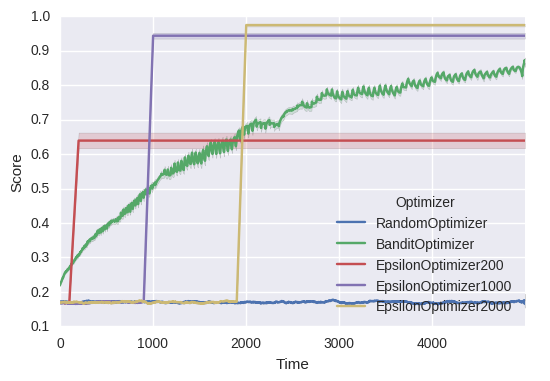

In [13]:
runSimulation(30, 3, 5000, [200, 1000, 2000])